<a href="https://colab.research.google.com/github/plaban1981/Hugging_Face_transformers_topics/blob/main/Semantic_Search_using_haystack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install 'farm-haystack[all]'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588 kB 24.5 MB/s 
     |████████████████████████████████| 17.0 MB 164 kB/s 
     |████████████████████████████████| 50 kB 2.6 MB/s 
     |████████████████████████████████| 85 kB 5.9 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 
     |████████████████████████████████| 4.7 MB 47.7 MB/s 
     |████████████████████████████████| 2.1 MB 38.6 MB/s 
     |████████████████████████████████| 5.6 MB 55.5 MB/s 
     |████████████████████████████████| 10.7 MB 64.7 MB/s 
     |████████████████████████████████| 385 kB 70.0 MB/s 
     |████████████████████████████████| 182 kB 74.5 MB/s 
     |████████████████████████████████| 228 kB 58.6 MB/s 
     |████████████████████████████████| 981 kB 57.6 MB/s 
     |████████████████████████████████| 6.6 MB 57.5 MB/s 
     |████████████████████████████████| 172 kB 74.8 MB/s 
     |██████████████████████████████

## Building a Semantic Search Engine

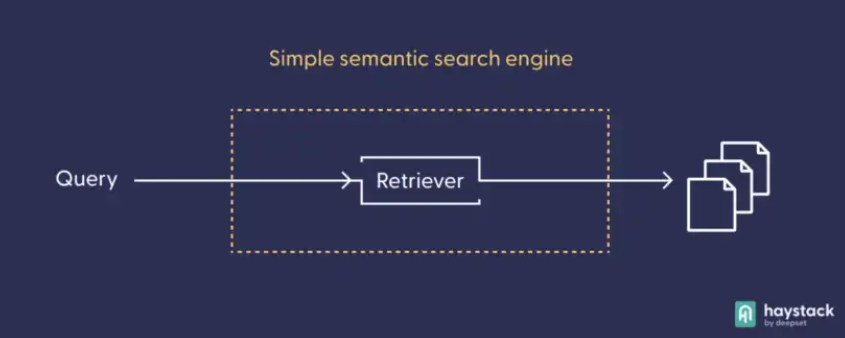

* We can think of the DocumentStore as a database that stores our texts and meta data and provides them to the Retriever at query time.

* By far the most common way to use a DocumentStore in Haystack is to fetch documents using a Retriever

* The FAISSDocumentStore requires no external setup. Start it by simply using this line:
      -from haystack.document_stores import FAISSDocumentStore
      -document_store = FAISSDocumentStore(faiss_index_factory_str="Flat")

## Save & Load
FAISS document stores can be saved to disk and reloaded:

    from haystack.document_stores import FAISSDocumentStore
    document_store = FAISSDocumentStore(faiss_index_factory_str="Flat")
    # Generates two files: my_faiss_index.faiss and my_faiss_index.json
    document_store.save("my_faiss_index.faiss")
    # Looks for the two files generated above
    new_document_store = FAISSDocumentStore.load("my_faiss_index.faiss")
    assert new_document_store.faiss_index_factory_str == "Flat" 



While my_faiss_index.faiss contains the index, my_faiss_index.json contains the parameters used to initialize it (like faiss_index_factory_store). This configuration file is necessary for load() to work. It simply contains the initial parameters in a JSON format.

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Install required library

In [3]:
%%bash
pip install git+https://github.com/deepset-ai/haystack.git
pip install 'farm-haystack[faiss]'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/deepset-ai/haystack.git to /tmp/pip-req-build-1yg3u1fu
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached sentence-transformers-2.2.2.tar.gz (85 kB)
  Using cached huggingface_hub-0.11.1-py3-none-any.whl (182 kB)
  Using cached python-docx-0.8.11.tar.gz (5.6 MB)
  Using cached transformers-4.21.2-py3-none-any.whl (4.7 MB)
  Using cached elasticsearch-7.17.7-py2.py3-none-any.whl (385 kB)
  Using cached quantulum3-0.7.11-py3-none-any.whl (10.7 MB)
  Using cached tika-1.24.tar.gz (28 kB)
  Using cached langdetect-1.0.9.tar.gz (981 kB)
  Using cached azure_ai_formrecognizer-3.2.0-py3-none-any.

  Running command git clone -q https://github.com/deepset-ai/haystack.git /tmp/pip-req-build-1yg3u1fu


* Reading and converting the files, having stored them as .txt documents locally under datapath. 
* Haystack’s convert_files_to_docs function recognizes the files’ format automatically and converts them into objects of the Document class, which can then be read into the document store.

In [6]:
datapath = "/content/drive/MyDrive/AFW/Semantic_Search/docs"

In [7]:
from haystack.utils import convert_files_to_docs
all_docs = convert_files_to_docs(dir_path=datapath, split_paragraphs = "True")

In [25]:
#all_docs

## import the FAISSDocumentStore class, initialize the document store, and add the documents.

In [9]:
from haystack.document_stores.faiss import FAISSDocumentStore
document_store = FAISSDocumentStore(faiss_index_factory_str="Flat", similarity="cosine")
document_store.write_documents(all_docs)

Writing Documents:   0%|          | 0/5261 [00:00<?, ?it/s]

* Next, import the retriever class and initialize it with the retrieval model that you want to use for this task. Set the top_k parameter — the number of documents returned by the retriever — to 3.

In [10]:
from haystack.nodes import EmbeddingRetriever
model = 'sentence-transformers/multi-qa-mpnet-base-dot-v1'
retriever = EmbeddingRetriever(document_store=document_store, use_gpu=True, embedding_model=model, top_k=3)

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/737 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.65k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.9k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

* update the documents in the document store by running them through the retriever model

In [11]:
document_store.update_embeddings(retriever)

Updating Embedding:   0%|          | 0/5206 [00:00<?, ? docs/s]

Batches:   0%|          | 0/163 [00:00<?, ?it/s]

* After we have  indexed our documents,then we have to set up the pipeline by importing the class and initializing it with the retriever.

In [12]:
from haystack.pipelines import DocumentSearchPipeline
semantic_search_pipeline = DocumentSearchPipeline(retriever=retriever)

In [13]:
context = "what is the name of the galaxy where we live?"
prediction = semantic_search_pipeline.run(query=context)
prediction

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

{'documents': [<Document: {'content': '\uf0b7   The name galaxy where we live is ‘Milky Way.’', 'content_type': 'text', 'score': 0.9413245916366577, 'meta': {'name': 'general_knowledge_tutorial.txt', 'vector_id': '1312'}, 'embedding': None, 'id': '75c0b396063300ca694350d57443911e'}>,
  <Document: {'content': '\uf0b7   The Solar System is a part of Milky Way.', 'content_type': 'text', 'score': 0.8623470962047577, 'meta': {'name': 'general_knowledge_tutorial.txt', 'vector_id': '1315'}, 'embedding': None, 'id': '6606e9747fc221ecf313e4cd2f7aa36'}>,
  <Document: {'content': '\uf0b7   Galaxy is a huge collection of stellar and interstellar matter, which are bound\n    together by its own gravity in the Space. There are several galaxies in the\n    universe, for example, Milky Way.', 'content_type': 'text', 'score': 0.8156131505966187, 'meta': {'name': 'general_knowledge_tutorial.txt', 'vector_id': '1311'}, 'embedding': None, 'id': '8fdab2729f123d0f1fc8ec4feba9b8fb'}>],
 'root_node': 'Query',

In [14]:
print(prediction.keys())

dict_keys(['documents', 'root_node', 'params', 'query', 'node_id'])


In [15]:
for i, pred in enumerate(prediction['documents']):
   print(i, pred.content[:100] + '\n')

0    The name galaxy where we live is ‘Milky Way.’

1    The Solar System is a part of Milky Way.

2    Galaxy is a huge collection of stellar and interstellar matter, which are bound
    together by 



In [16]:
question = "What is Graminology?"
prediction = semantic_search_pipeline.run(query=question)
for i, pred in enumerate(prediction['documents']):
   print(i, pred.content[:100] + '\n')

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0 Graminology       Study of grasses

1 Lexicology        Study of words and their meanings

2 Semasiology       Study of meaning; semantics



## Save Document Store

In [17]:
# Generates two files: my_faiss_index.faiss and my_faiss_index.json
document_store.save("my_faiss_index.faiss")
# Looks for the two files generated above
new_document_store = FAISSDocumentStore.load("my_faiss_index.faiss")
assert new_document_store.faiss_index_factory_str == "Flat" 

## load the document store into a new loader

In [18]:
new_retriever = EmbeddingRetriever(document_store=new_document_store, use_gpu=True, embedding_model=model, top_k=3)

## Make Inference on the new retriever

In [19]:
from haystack.pipelines import DocumentSearchPipeline
semantic_search_pipeline_new = DocumentSearchPipeline(retriever=new_retriever)

In [20]:
question = "Is Mercury a planet in the solar system?"
prediction = semantic_search_pipeline_new.run(query=question)
for i, pred in enumerate(prediction['documents']):
   print(i, pred.content[:100] + '\n')

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0 Solar System .......................................................................................

1    The largest planet is Jupiter and Mercury is the smallest planet of the system.

2 
   There are eight planets namely (arranged in the order of increasing distance
    from the Sun):



## Python Semantic Search Engine

* The ranker uses its own Transformer-based language model to re-rank the documents it receives from the retriever

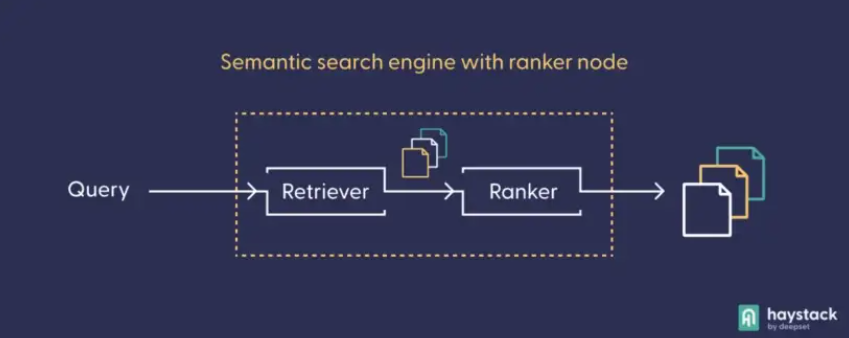

* We need to import two additional classes — the general pipeline and the ranker node — and instantiate them.

In [21]:
from haystack import Pipeline
from haystack.nodes import SentenceTransformersRanker

pipeline = Pipeline()
ranker_model = "cross-encoder/ms-marco-MiniLM-L-12-v2"
ranker = SentenceTransformersRanker(model_name_or_path=ranker_model, top_k=3)

* add the two modules — retriever and ranker — to your pipeline object

In [22]:
pipeline.add_node(component=retriever, name='Retriever', inputs=['Query'])
pipeline.add_node(component=ranker, name='Ranker', inputs=['Retriever'])

In [23]:
prediction  = pipeline.run(query=question)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
for i, pred in enumerate(prediction['documents']):
   print(i, pred.content[:100] + '\n')

0    The largest planet is Jupiter and Mercury is the smallest planet of the system.

1 Solar System .......................................................................................

2 
   There are eight planets namely (arranged in the order of increasing distance
    from the Sun):

